In [105]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd
import matplotlib.colors as mcolors

import cudf

df = cudf.read_csv('/tmp/query_sort_order_by_scale_1_rngseed_0_n2-standard-8-limit-100.csv')
# Perform any necessary preprocessing


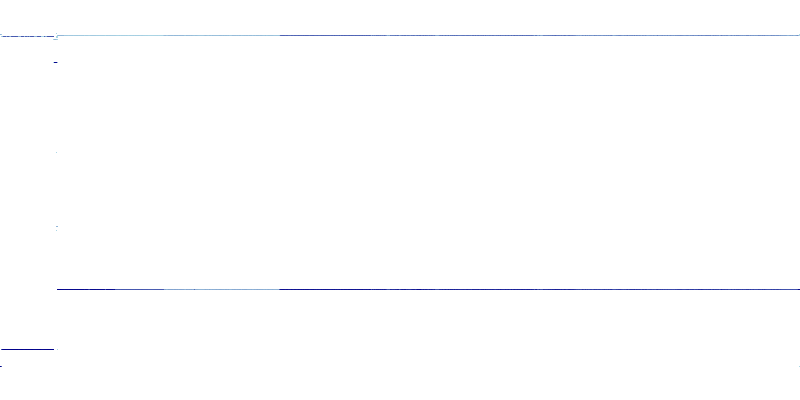

""

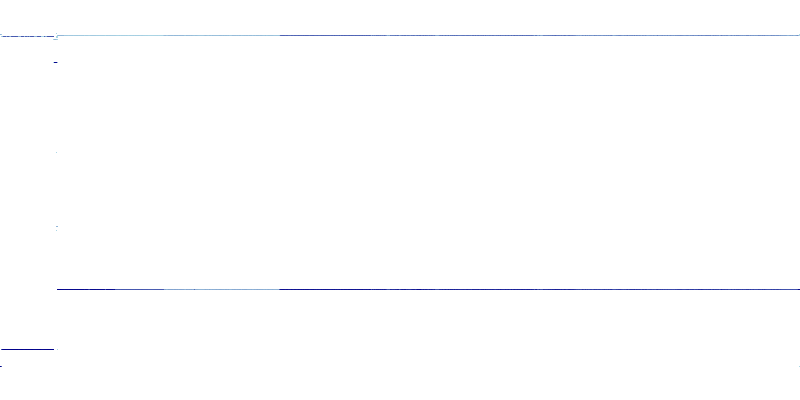

In [115]:


def adjust_range(x, y, x_slider, y_slider):
    x_new = x + (y-x)*x_slider
    y_new = x + (y-x)*y_slider
    return x_new, y_new

x_range = (df['timestamp'].min(), df['timestamp'].max())
y_range = (df['address'].min(), df['address'].max())

y_range_new = adjust_range(*y_range, -0.1, 1.1)

canvas = ds.Canvas(plot_width=800, plot_height=400,
                   x_range=x_range,
                   y_range=y_range_new,
                  )

agg = canvas.points(df, 'timestamp', 'address')
img = tf.shade(agg)


# Spread the points to make them larger
spread_img = tf.spread(img, px=2, shape='square')  # Increase px for larger dots

# Display in Jupyter Notebook
img_pil = img.to_pil()
display(img_pil)

# Or save to a file
img_pil.save("time_series_plot.png")

tf.Images(img)

In [111]:

number_of_bins = 5

# Binning the 'count' values into categories
df['count_binned'] = pd.qcut(df['count'].to_pandas(), q=number_of_bins, labels=False, duplicates='drop')

# Convert binned counts back to cuDF Series if needed
df['count_binned'] = cudf.Series(df['count_binned'])

df['count_binned'] = df['count_binned'].astype('category')

# Now use the binned counts for aggregation
agg = canvas.points(df, 'timestamp', 'address', ds.count_cat('count_binned'))


# Unique count values
unique_counts = df['count_binned'].unique()  # Assuming df is a cuDF DataFrame

# Generate a list of colors
colormap = plt.cm.get_cmap('viridis', len(unique_counts))  # Use any suitable colormap
colors = [mcolors.to_hex(colormap(i)) for i in range(colormap.N)]

# Create a color key
color_key = dict(zip(unique_counts.values_host, colors))

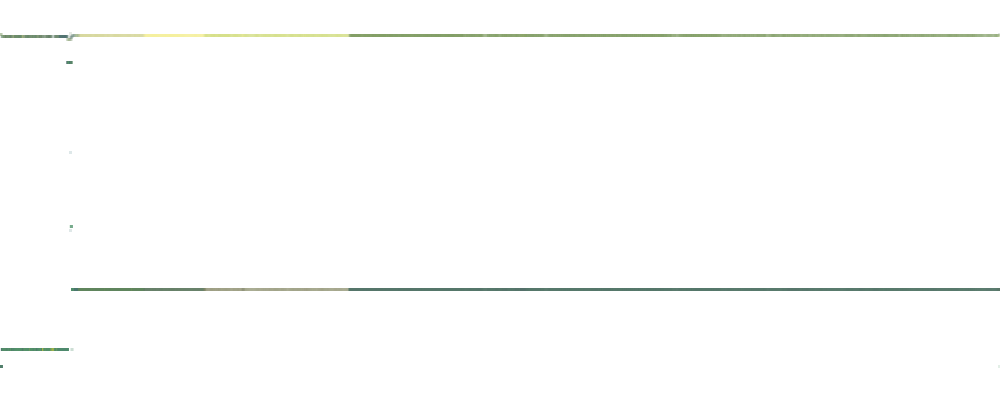

In [119]:

def adjust_range(x, y, x_slider, y_slider):
    x_new = x + (y-x)*x_slider
    y_new = x + (y-x)*y_slider
    return x_new, y_new

x_range = (df['timestamp'].min(), df['timestamp'].max())
y_range = (df['address'].min(), df['address'].max())

y_range_new = adjust_range(*y_range, -0.1, 1.1)

canvas = ds.Canvas(plot_width=1000, plot_height=400,
                   x_range=x_range,
                   y_range=y_range_new,
                  )

agg = canvas.points(df, 'timestamp', 'address', ds.count_cat('count_binned'))
img = tf.shade(agg, color_key=color_key)


# Spread the points to make them larger
spread_img = tf.spread(img, px=1, shape='square')  # Increase px for larger dots

# Display in Jupyter Notebook
img_pil = spread_img.to_pil()
display(img_pil)

# Or save to a file
img_pil.save("time_series_plot.png")


""

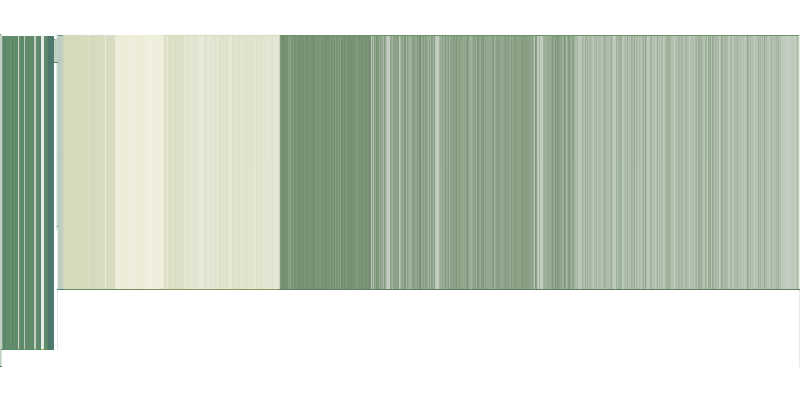

In [113]:
x_range = (df['timestamp'].min(), df['timestamp'].max())
y_range = (df['address'].min(), df['address'].max())

y_range_new = adjust_range(*y_range, -0.1, 1.1)

canvas = ds.Canvas(plot_width=800, plot_height=400,
                   x_range=x_range,
                   y_range=y_range_new,
                  )

agg = canvas.line(df, 'timestamp', 'address', ds.count_cat('count_binned'))
img = tf.shade(agg, color_key=color_key)
# Display in Jupyter Notebook
#img_pil = img.to_pil()
#display(img_pil)


tf.Images(img)